## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [37]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [5]:
column_names = ["DATE", "TAG", "POSTS"]
# dataframe
df = pd.read_csv("query_results.csv", names=column_names, header=0)
# Setting the header row to 0 allows us to substitute our own column names

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [6]:
print(df.head())
print(df.tail())

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    507
4  2008-08-01 00:00:00       c++    164
                     DATE     TAG  POSTS
2281  2022-04-01 00:00:00     php   3918
2282  2022-04-01 00:00:00  python  23968
2283  2022-04-01 00:00:00       r   4814
2284  2022-04-01 00:00:00    ruby    496
2285  2022-04-01 00:00:00   swift   1830


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [7]:
#rows
print(df.shape[0])
#columns
print(df.shape[1])

print(df.shape)

2286
3
(2286, 3)


**Challenge**: Count the number of entries in each column of the dataframe

In [8]:
df.count()

DATE     2286
TAG      2286
POSTS    2286
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [9]:
# top_language = df.sort_values(by="POSTS", ascending=False)
# # top_language[["TAG", "POSTS"]].groupby["TAG"]
# top_language.groupby("TAG").count()

df.groupby("TAG").sum().sort_values(by="POSTS", ascending=False)

,POSTS
TAG,
javascript,2362112
python,1931570
java,1838572
c#,1533052
php,1432151
c++,761504
r,445440
c,378039
swift,311517


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [10]:
df.groupby("TAG").count().sort_values(by="POSTS", ascending=True)

,DATE,POSTS
TAG,,
go,150,150
swift,157,157
r,163,163
assembly,165,165
c,165,165
c++,165,165
delphi,165,165
java,165,165
javascript,165,165


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [11]:
print(type(df.DATE[1]))

<class 'str'>


In [12]:
# convert string into date
pd.to_datetime(df.DATE)

0      2008-07-01
1      2008-08-01
2      2008-08-01
3      2008-08-01
4      2008-08-01
          ...    
2281   2022-04-01
2282   2022-04-01
2283   2022-04-01
2284   2022-04-01
2285   2022-04-01
Name: DATE, Length: 2286, dtype: datetime64[ns]

In [13]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,164


## Data Manipulation



In [16]:
# pivot the df DataFrame so that each row is a date and each column is a programming language
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [18]:
# rows and columns
reshaped_df.shape

(166, 14)

In [22]:
# column names
# print(type(reshaped_df.columns))
for column_name in reshaped_df.columns: print(column_name)

assembly
c
c#
c++
delphi
go
java
javascript
perl
php
python
r
ruby
swift


In [24]:
print(reshaped_df.head())
print(reshaped_df.tail())

TAG         assembly      c      c#    c++  delphi  go    java  javascript  \
DATE                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   83.0   507.0  164.0    14.0 NaN   222.0       164.0   
2008-09-01      28.0  319.0  1648.0  754.0   105.0 NaN  1135.0       638.0   
2008-10-01      15.0  303.0  1989.0  809.0   112.0 NaN  1152.0       725.0   
2008-11-01      17.0  259.0  1732.0  734.0   141.0 NaN   957.0       580.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  160.0   120.0  NaN   70.0    NaN  
2008-09-01  130.0  480.0   537.0  6.0  288.0    NaN  
2008-10-01  127.0  614.0   508.0  NaN  249.0    NaN  
2008-11-01   97.0  502.0   452.0  1.0  159.0    NaN  
TAG         assembly       c      c#     c++  delphi     go    java  \
DATE

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [26]:
reshaped_df.count()

TAG
assembly      165
c             165
c#            166
c++           165
delphi        165
go            150
java          165
javascript    165
perl          165
php           165
python        165
r             163
ruby          165
swift         157
dtype: int64

In [36]:
# some cells are NaN
# replace those cells with 0
reshaped_df.fillna(value=0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,164.0,14.0,0.0,222.0,164.0,28.0,160.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1648.0,754.0,105.0,0.0,1135.0,638.0,130.0,480.0,537.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1989.0,809.0,112.0,0.0,1152.0,725.0,127.0,614.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,957.0,580.0,97.0,502.0,452.0,1.0,159.0,0.0


In [35]:
# reshaped_df.head()
# check if there is any NaN in the df
reshaped_df.isna().values.any()


False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

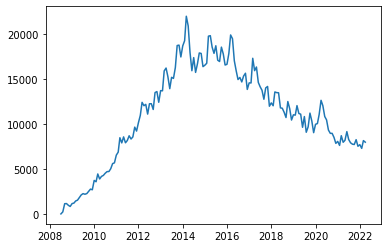

In [44]:
plt.plot(reshaped_df.index, reshaped_df.java)
# reshaped_df.java

In [14]:
# .figure() - allows us to resize our chart

# .xticks() - configures our x-axis

# .yticks() - configures our y-axis

# .xlabel() - add text to the x-axis

# .ylabel() - add text to the y-axis

# .ylim() - allows us to set a lower and upper bound 

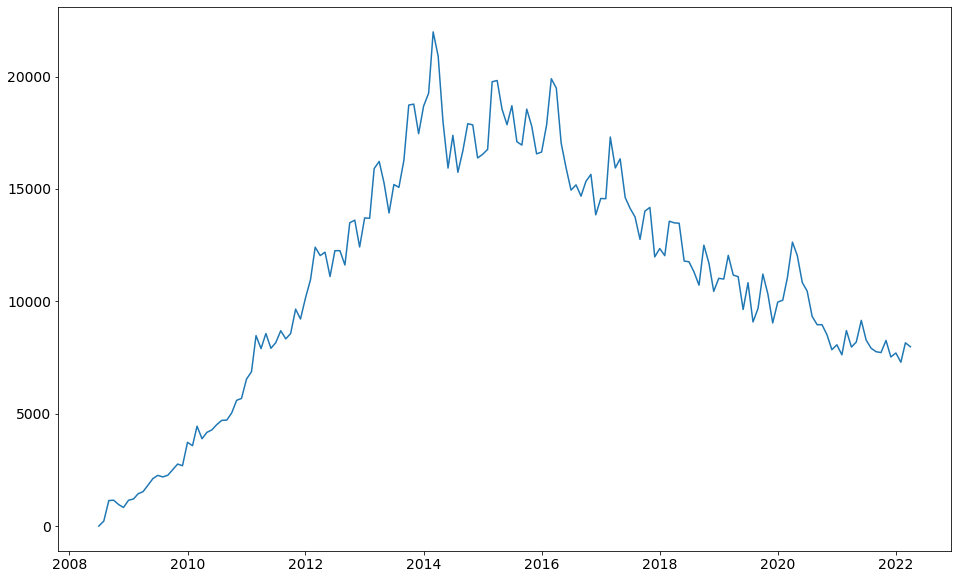

In [48]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)  # we're never going to get less than 0 posts, so let's set a lower limit of 0 for the y-axis with .ylim()
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

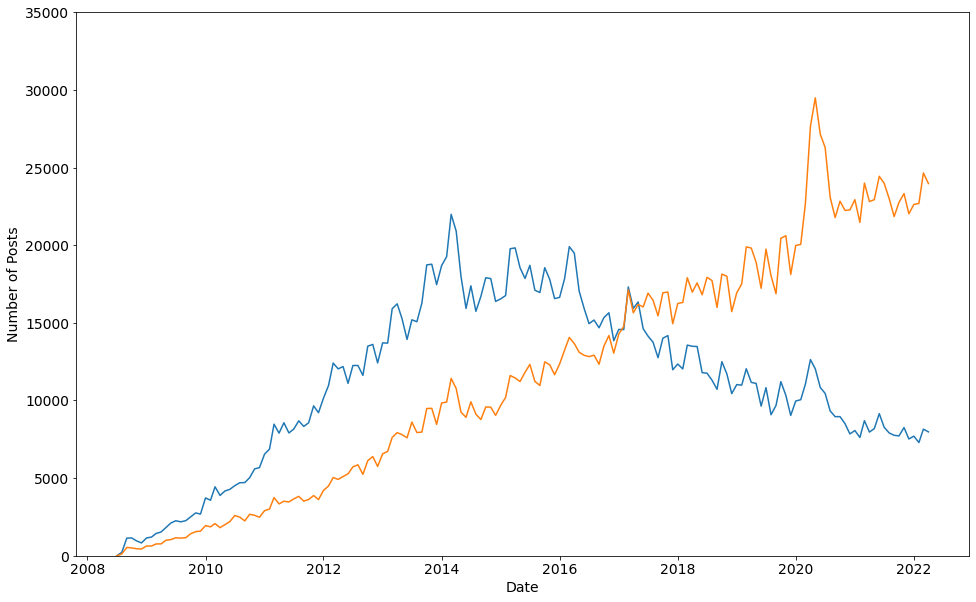

In [51]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

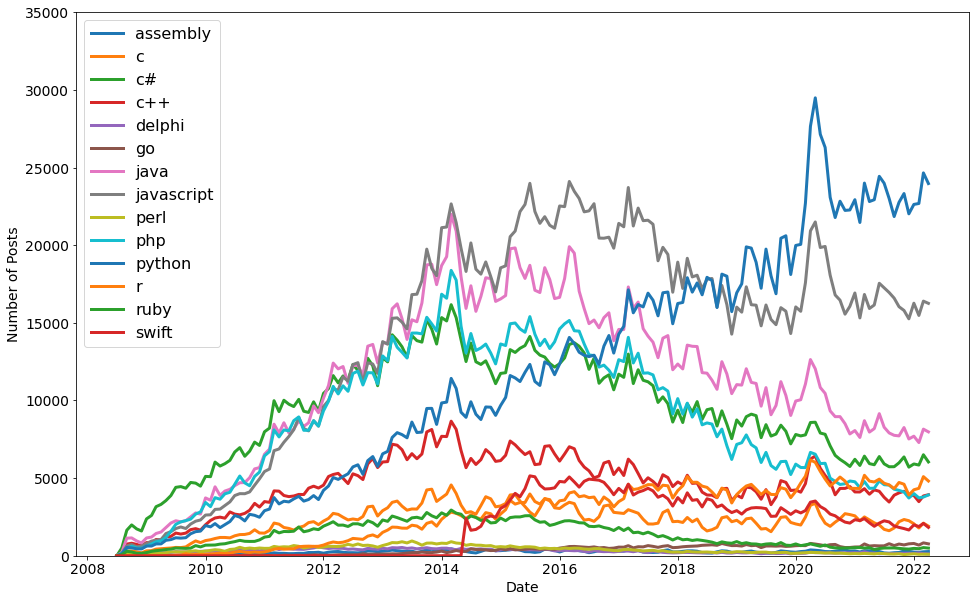

In [58]:
# plot all the programming languages on the same chart
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
  
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
              linewidth=3, label=reshaped_df[column].name)
  
plt.legend(fontsize=16) # display programming language corresponding to the line color, label is required

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [60]:
#  The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

In [66]:
print("Reshaped DF", reshaped_df.count())
print("Roll DF", roll_df.count())

Reshaped DF TAG
assembly      166
c             166
c#            166
c++           166
delphi        166
go            166
java          166
javascript    166
perl          166
php           166
python        166
r             166
ruby          166
swift         166
dtype: int64
Roll DF TAG
assembly      161
c             161
c#            161
c++           161
delphi        161
go            161
java          161
javascript    161
perl          161
php           161
python        161
r             161
ruby          161
swift         161
dtype: int64


In [83]:
print("Reshaped DF Head", reshaped_df.head(n=10))
print()
print("Roll DF Head", roll_df.head(n=10))
print()
print("Reshaped DF Tail", reshaped_df.tail(n=5))
print()
print("Roll DF Tail", roll_df.tail(n=5))

Reshaped DF Head TAG         assembly      c      c#     c++  delphi   go    java  javascript  \
DATE                                                                           
2008-07-01       0.0    0.0     3.0     0.0     0.0  0.0     0.0         0.0   
2008-08-01       8.0   83.0   507.0   164.0    14.0  0.0   222.0       164.0   
2008-09-01      28.0  319.0  1648.0   754.0   105.0  0.0  1135.0       638.0   
2008-10-01      15.0  303.0  1989.0   809.0   112.0  0.0  1152.0       725.0   
2008-11-01      17.0  259.0  1732.0   734.0   141.0  0.0   957.0       580.0   
2008-12-01      17.0  189.0  1597.0   631.0   134.0  0.0   829.0       626.0   
2009-01-01      22.0  321.0  2377.0   851.0   164.0  0.0  1148.0       792.0   
2009-02-01      37.0  332.0  2599.0   843.0   167.0  0.0  1207.0       948.0   
2009-03-01      24.0  430.0  3163.0  1052.0   161.0  0.0  1436.0      1007.0   
2009-04-01      50.0  457.0  3311.0  1019.0   185.0  0.0  1532.0      1049.0   

TAG          perl    p

In [74]:
# roll_df = reshaped_df.rolling(window=3).mean()  # less smooth curve
# roll_df = reshaped_df.rolling(window=12).mean() # very smooth curve
roll_df = reshaped_df.rolling(window=6).mean()


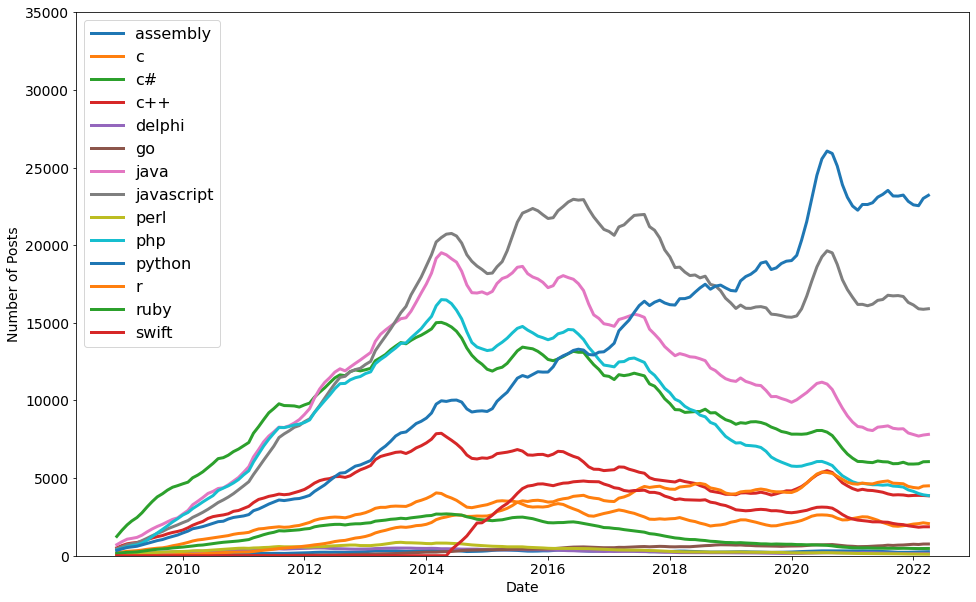

In [75]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)